In [2]:
# #Link
# https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# https://www.analyticsvidhya.com/blog/2018/10/mining-online-reviews-topic-modeling-lda/
# https://www.scrapehero.com/how-to-analyse-product-reviews-using-lda-topic-modelling/

In [3]:
import nltk
from nltk.corpus import stopwords

import pandas as pd
import re

In [4]:
#import file
data_file = "AllData_Process_Topic.csv"
data = pd.read_csv(data_file)
data.columns = data.columns.str.strip().str.replace(" ","_")


data = data[data["Review_splitted"] != "no comments review is an image" ]
data = data[data["Review_splitted"] != "no review receive" ]
data = data[data["Review_splitted"] != "your review has been hidden due to inappropriate content note hope may remove the coins awarded for this review" ]
review = data['Review_splitted']

In [32]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

stop_list = nltk.corpus.stopwords.words('english')
data_words = list(sent_to_words(review))

review_lower = [[w.lower() for w in doc]for doc in data_words]
review_check = [[w for w in doc if re.search('^[a-z]+$', w)]for doc in review_lower]
review_stopword = [[w for w in doc if w not in stop_list]for doc in review_check]

#print(review_stopword)

In [33]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): 
    # filter noun and adjective
   output = []
   for sent in texts:
         doc = nlp(" ".join(sent)) 
         output.append([token.lemma_ for token in doc if token.pos_ in tags])
   return output

In [34]:
reviews_lem = lemmatization(data_words)
reviews = []
for i in range(len(reviews_lem)):
    reviews.append(' '.join(reviews_lem[i]))
    
data['Review_lem'] = reviews 
data.head()

,Unnamed:_0,Platform,Brand,Category,Product_Name,Price,Reviewer,Review,Review_splitted,Product_Purchase,Ratings,Date_Of_Review,Response,Review_lem
0,0,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,zenheng,"delivery was quite fast, and item was on disco...",delivery was quite fast and item was on discou...,NaN,4.0,2020-02-06 23:58:00,no,delivery fast item discount product
1,1,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,glennoeestaquio,received item sealed properly.\r\r\nquick deli...,received item sealed properly quick delivery t...,NaN,5.0,2020-02-06 12:44:00,no,item quick delivery item purpose
2,2,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,shy2206,yet to try but delivery was prompt and product...,yet to try but delivery was prompt and product...,NaN,5.0,2020-02-06 10:21:00,no,delivery prompt product long expiry
3,3,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,lindamiyalin,"well wrapped, in good condition, super fast ...",well wrapped in good condition super fast deli...,NaN,5.0,2020-01-30 23:01:00,no,good condition fast delivery first time thank ...
4,4,Shopee,L'Oreal Paris,Serum & Treatment,L'Oreal Paris Revitalift Crystal Micro-Essence...,25.9,kyc385,"well packed, will buy again",well packed will buy again,NaN,5.0,2020-02-01 11:40:00,no,packed


In [35]:
from gensim import corpora
unique_word = corpora.Dictionary(review_stopword)
#print(unique_word)

corpus = [dictionary.doc2bow(review) for review in review_stopword]
#print(corpus)

### Exploratory Analysis 

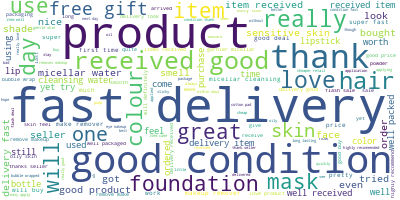

In [36]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.

long_string = ','.join(list(data['Review'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

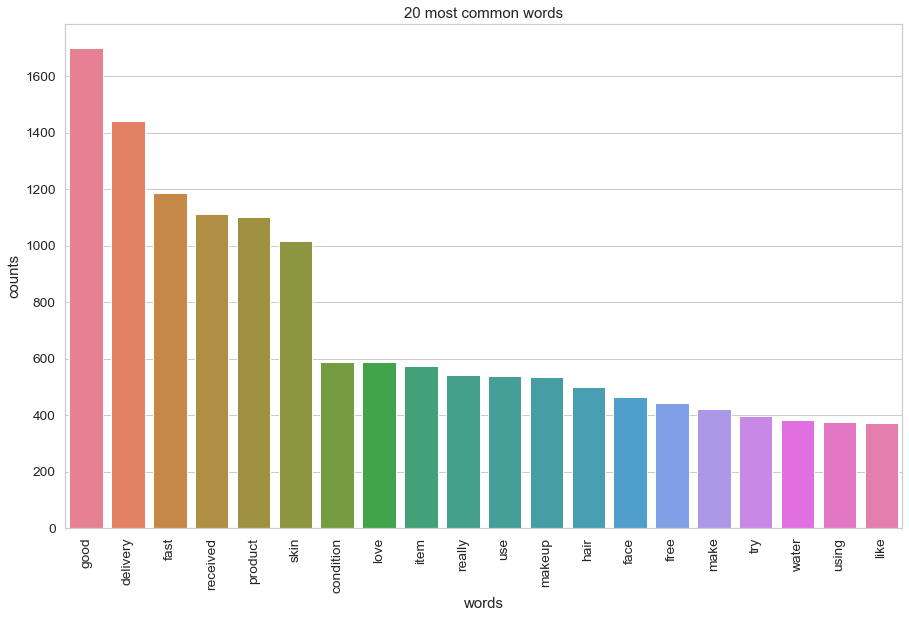

In [11]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['Review'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### Exploratpry Analysis - for review lemmatize

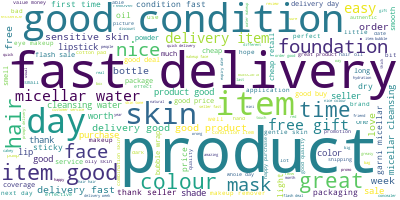

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.

long_string = ','.join(list(data['Review_lem'].values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

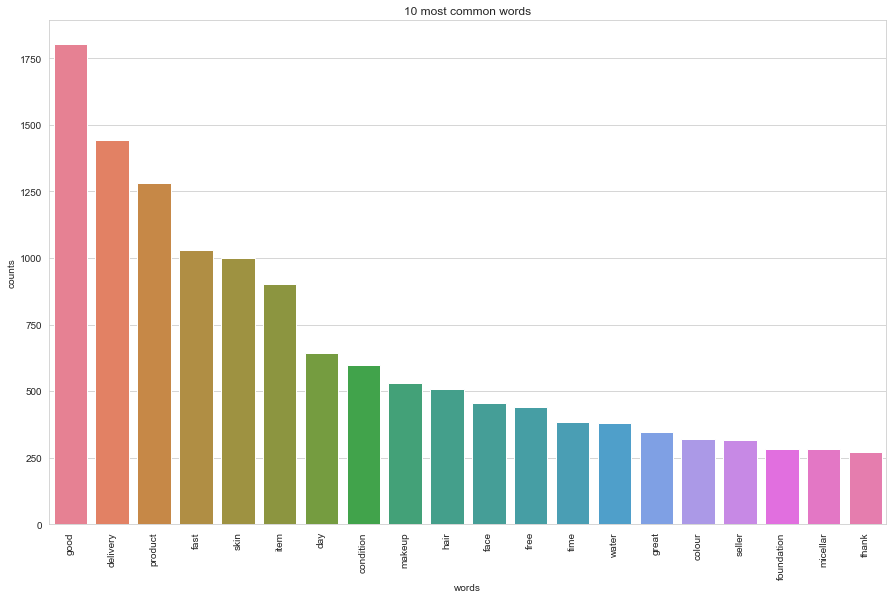

In [10]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['Review_lem'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### LDA model training and results visualization

In [12]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
#         topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
#                         for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

# Tweak the two parameters below
number_topics = 3
number_words = 10


# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)
#display_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
skin makeup face make water product use remove micellar using

Topic #1:
hair love really product colour day matte long dry skin

Topic #2:
good delivery fast received condition item product free items seller


In [15]:
number_topics = 3
word_dict = {}

lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=number_topics)

for i in range(number_topics):
    words = lda.show_topic(i, topn = 15)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03
0,skin,good,makeup
1,water,delivery,skin
2,product,received,face
3,micellar,fast,make
4,cleansing,product,good
5,garnier,makeup,use
6,make,condition,product
7,like,love,remove
8,removes,free,really
9,use,micellar,love


### LDA Mallet

In [20]:
import gensim
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os
os.environ.update({'MALLET_HOME':r'C:/Softwares/mallet/mallet-2.0.8/'})

no_topics=2

mallet_path = r'C:\Softwares\mallet\mallet-2.0.8\bin\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=no_topics, id2word=dictionary)

In [24]:
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=review_stopword, dictionary=unique_word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score LDAMallet: ', coherence_ldamallet)


# Compute Perplexity
perplex= lda.log_perplexity(corpus, total_docs=None) #For LDAModel
  # a measure of how good the model is. lower the better.
print('\nPerplexity for LDAModel: ', perplex)


Coherence Score LDAMallet:  0.4664872109713214

Perplexity for LDAModel:  -6.817945308016527


In [31]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    sg_lda_x = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=corpus, num_topics=num_topics, id2word=unique_word)
    coherencemodel = CoherenceModel(model=sg_lda_x, texts=review_stopword, dictionary=unique_word, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())
## result will be in ananconda prompt

2020-02-21 14:42:58.290755
#Topics: 2 Score: 0.4785894275930086
#Topics: 3 Score: 0.4618038790291468
#Topics: 4 Score: 0.5195567538518548
#Topics: 5 Score: 0.4699071823789289
#Topics: 6 Score: 0.4469959295596269
#Topics: 7 Score: 0.4461858469236138
#Topics: 8 Score: 0.4810045836952665
#Topics: 9 Score: 0.4279319707892185
2020-02-21 14:44:30.231133
